In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


#### Looks like there are multiple entries for few customers

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


#### Looks like there are null values in Product_Category_2 & Product_Category_3

In [6]:
#filling null values with 0
df = df.fillna(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


##### From the above we can say that our Target Variable i.e., Purchase is an integer value which means we've to perform Linear Regression on it.
##### So, we'll convert all categorical variables into Numerical

##### As part of cleaning up data, as there are multiple entries for the same customer/userid. We'll group them i.e., we'll have a single entry for customer/userid and sum up their relevant numeric data and reset their index.

In [8]:
data_numeric = df[["User_ID", "Product_Category_1", "Product_Category_2", "Product_Category_3", "Purchase"]].groupby("User_ID").sum().reset_index().drop("User_ID", axis=1)

In [9]:
data_numeric

,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,213,132.0,148.0,334093
1,354,539.0,359.0,810472
2,93,117.0,148.0,341635
3,33,102.0,127.0,206468
4,659,642.0,207.0,821001
...,...,...,...,...
5886,3200,3403.0,1509.0,4116058
5887,938,894.0,456.0,1119538
5888,83,93.0,51.0,90034
5889,439,580.0,324.0,590319


##### Now let us drop duplicates from the categorical fields as we can't group and sum up categorical values and reset the index.

In [10]:
data_categorical = df.drop_duplicates('User_ID')[["User_ID", "Gender", "Age", "Occupation","City_Category", "Stay_In_Current_City_Years", "Marital_Status"]].reset_index().drop(["index"], axis=1)

In [11]:
data_categorical

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,F,0-17,10,A,2,0
1,1000002,M,55+,16,C,4+,0
2,1000003,M,26-35,15,A,3,0
3,1000004,M,46-50,7,B,2,1
4,1000005,M,26-35,20,A,1,1
...,...,...,...,...,...,...,...
5886,1004588,F,26-35,4,C,0,0
5887,1004871,M,18-25,12,C,2,0
5888,1004113,M,36-45,17,C,3,0
5889,1005391,M,26-35,7,A,0,0


###### Let us save the duplicate free data in a new data frame

In [12]:
data=pd.concat([data_numeric,data_categorical],axis=1)
data

,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,213,132.0,148.0,334093,1000001,F,0-17,10,A,2,0
1,354,539.0,359.0,810472,1000002,M,55+,16,C,4+,0
2,93,117.0,148.0,341635,1000003,M,26-35,15,A,3,0
3,33,102.0,127.0,206468,1000004,M,46-50,7,B,2,1
4,659,642.0,207.0,821001,1000005,M,26-35,20,A,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5886,3200,3403.0,1509.0,4116058,1004588,F,26-35,4,C,0,0
5887,938,894.0,456.0,1119538,1004871,M,18-25,12,C,2,0
5888,83,93.0,51.0,90034,1004113,M,36-45,17,C,3,0
5889,439,580.0,324.0,590319,1005391,M,26-35,7,A,0,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Product_Category_1          5891 non-null   int64  
 1   Product_Category_2          5891 non-null   float64
 2   Product_Category_3          5891 non-null   float64
 3   Purchase                    5891 non-null   int64  
 4   User_ID                     5891 non-null   int64  
 5   Gender                      5891 non-null   object 
 6   Age                         5891 non-null   object 
 7   Occupation                  5891 non-null   int64  
 8   City_Category               5891 non-null   object 
 9   Stay_In_Current_City_Years  5891 non-null   object 
 10  Marital_Status              5891 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 506.4+ KB


##### Let us convert the numerical variables to int from float

In [14]:
data[['Product_Category_2','Product_Category_3']]=data[['Product_Category_2','Product_Category_3']].astype('int64')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Product_Category_1          5891 non-null   int64 
 1   Product_Category_2          5891 non-null   int64 
 2   Product_Category_3          5891 non-null   int64 
 3   Purchase                    5891 non-null   int64 
 4   User_ID                     5891 non-null   int64 
 5   Gender                      5891 non-null   object
 6   Age                         5891 non-null   object
 7   Occupation                  5891 non-null   int64 
 8   City_Category               5891 non-null   object
 9   Stay_In_Current_City_Years  5891 non-null   object
 10  Marital_Status              5891 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 506.4+ KB


#### Let us perform the visualizing part for better understanding of the data

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

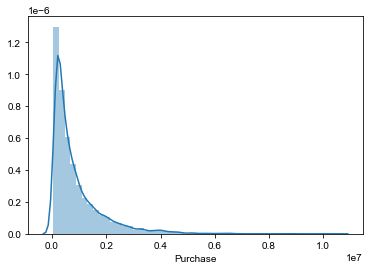

In [17]:
sns.distplot(data['Purchase'])
sns.set(rc={'figure.figsize':(10,10)})

##### From this plot we can say that Target Variable i.e., Purchase is normally distributed except that it is left skewed

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Product_Category_1          5891 non-null   int64 
 1   Product_Category_2          5891 non-null   int64 
 2   Product_Category_3          5891 non-null   int64 
 3   Purchase                    5891 non-null   int64 
 4   User_ID                     5891 non-null   int64 
 5   Gender                      5891 non-null   object
 6   Age                         5891 non-null   object
 7   Occupation                  5891 non-null   int64 
 8   City_Category               5891 non-null   object
 9   Stay_In_Current_City_Years  5891 non-null   object
 10  Marital_Status              5891 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 506.4+ KB


Univariate Analysis

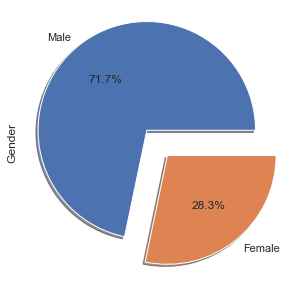

In [19]:
data['Gender'].value_counts().plot(labels=['Male','Female'],kind='pie',explode=[0.15,0.15], autopct='%3.1f%%',figsize=(5,5),shadow=True)
plt.show()

From the above pie plot we can say that there are more Male customers than that of Female

In [20]:
data['Marital_Status'].value_counts()

0    3417
1    2474
Name: Marital_Status, dtype: int64

As there are only 2 possible values in Marital_Status which says Married or Single, let us plot a pie chart again to see their distribution in %

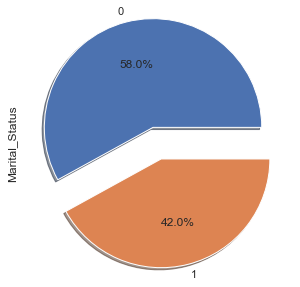

In [21]:
data['Marital_Status'].value_counts().plot(kind='pie',explode=[0.15,0.15], autopct='%3.1f%%',figsize=(5,5),shadow=True)
plt.show()

From this pie plot we can say that customers with Marital-Status=0 are more in number when compared to that of 1

In [22]:
data['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

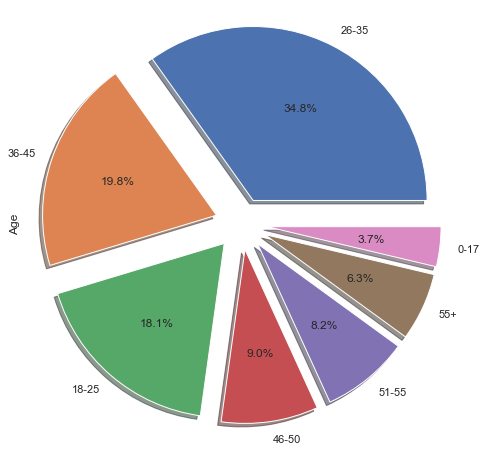

In [23]:
data['Age'].value_counts().plot(kind='pie',explode=[0.15,0.15,0.15,0.15,0.15,0.15,0.15], autopct='%3.1f%%',figsize=(8,8),shadow=True)
plt.show()

From this pie plot we can say that people in the age group of 26-35 are more in number

In [24]:
data['Stay_In_Current_City_Years'].value_counts()

1     2086
2     1145
3      979
4+     909
0      772
Name: Stay_In_Current_City_Years, dtype: int64

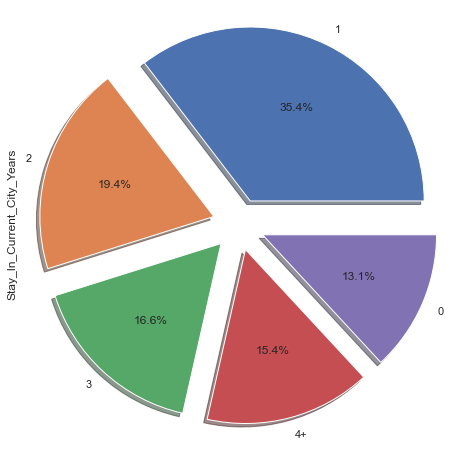

In [25]:
data['Stay_In_Current_City_Years'].value_counts().plot(kind='pie',explode=[0.15,0.15,0.15,0.15,0.15], autopct='%3.1f%%',figsize=(8,8),shadow=True)
plt.show()

From this pie plot we can say that people who are in City since last year are more in number in terms of participation in Sales

In [26]:
data['City_Category'].value_counts()

C    3139
B    1707
A    1045
Name: City_Category, dtype: int64

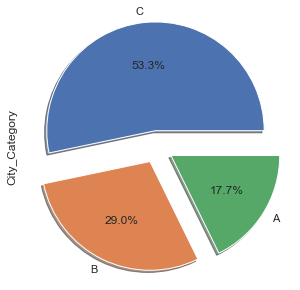

In [27]:
data['City_Category'].value_counts().plot(kind='pie',explode=[0.15,0.15,0.15], autopct='%3.1f%%',figsize=(5,5),shadow=True)
plt.show()

From this pie plot we can say that people from City_Cateogry=C are more in number in terms of participation in Sales

Bi-Variate Analysis

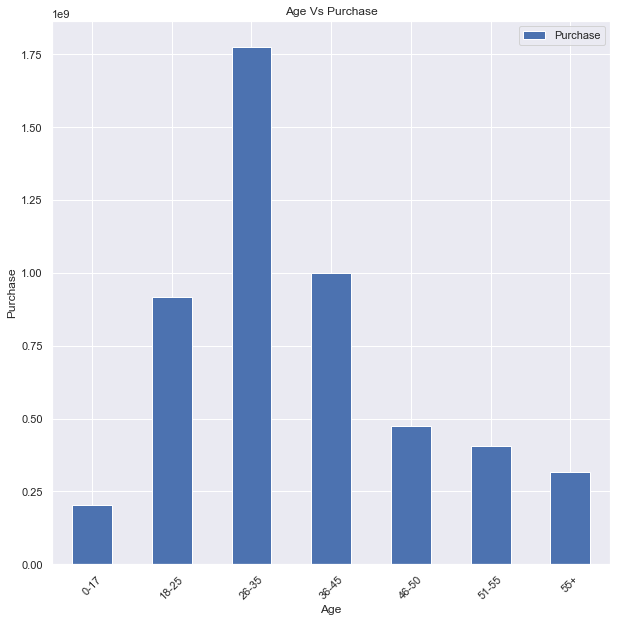

In [28]:
data.groupby(["Age"]).sum()[["Purchase"]].plot.bar(title="Age Vs Purchase")
plt.xticks(rotation=45)
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.show()

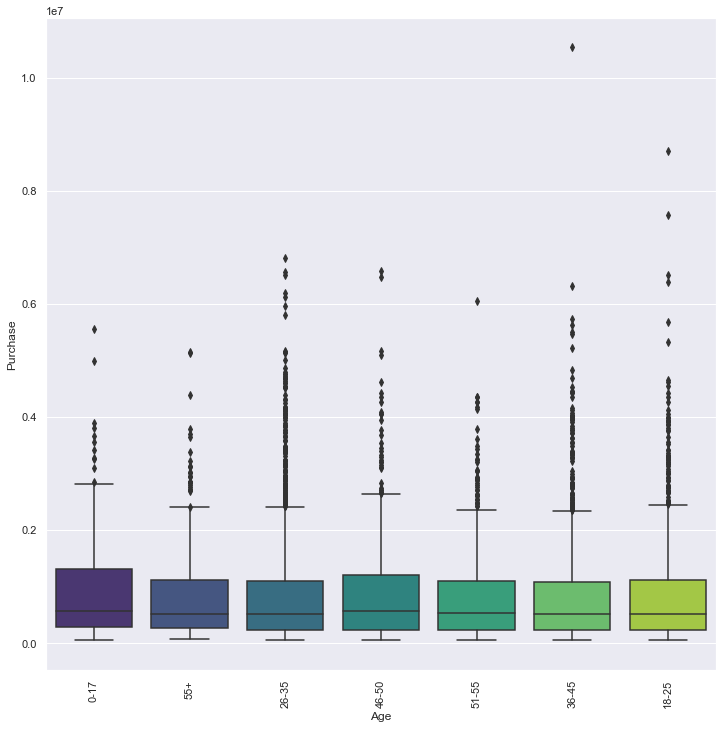

In [29]:
plt.figure(figsize=(12,12))
sns.boxplot(data=data, x='Age', y='Purchase', palette='viridis')
plt.xticks(rotation=90)
plt.show()

From this plot we can say that people in Age Group 26-35 contributed to more purchase followed by 36-45 & 18-25

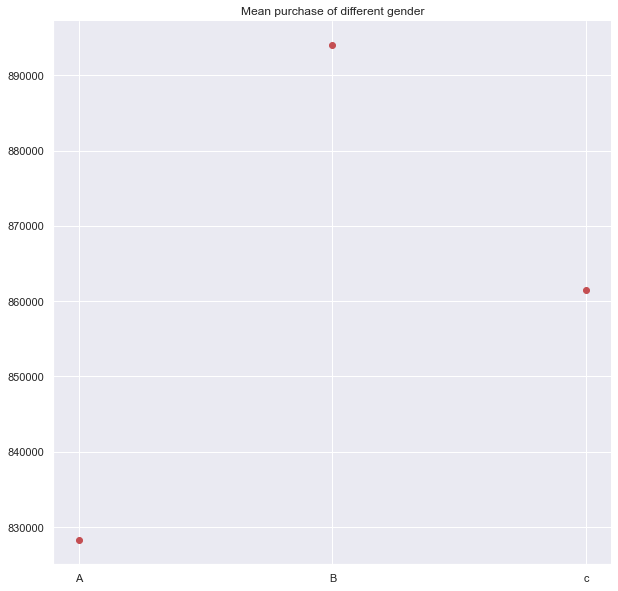

In [30]:
x = data.groupby(["City_Category"]).mean()[["Purchase"]].index
y = data.groupby(["City_Category"]).mean()[["Purchase"]].values
plt.plot(x, y,"ro")
plt.xticks(x, ["A","B","c"])
plt.title("Mean purchase of different gender")
sns.despine()

From this plot we can say that people from City_Category=B Contributed more towards the sales followed by C & A.

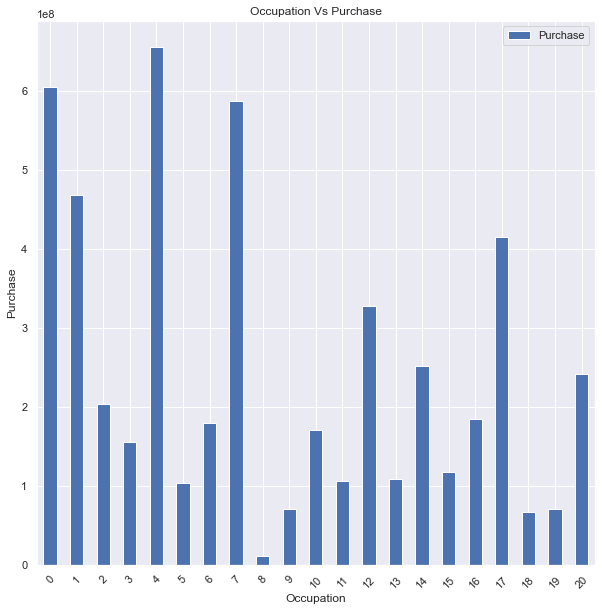

In [31]:
data.groupby(["Occupation"]).sum()[["Purchase"]].plot.bar(title="Occupation Vs Purchase")
plt.xticks(rotation=45)
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.show()

From this plot we can say that people in Occupation=4 have contributed more towards the sales

In [32]:
data.groupby(["Stay_In_Current_City_Years"]).mean()[["Purchase"]].index

Index(['0', '1', '2', '3', '4+'], dtype='object', name='Stay_In_Current_City_Years')

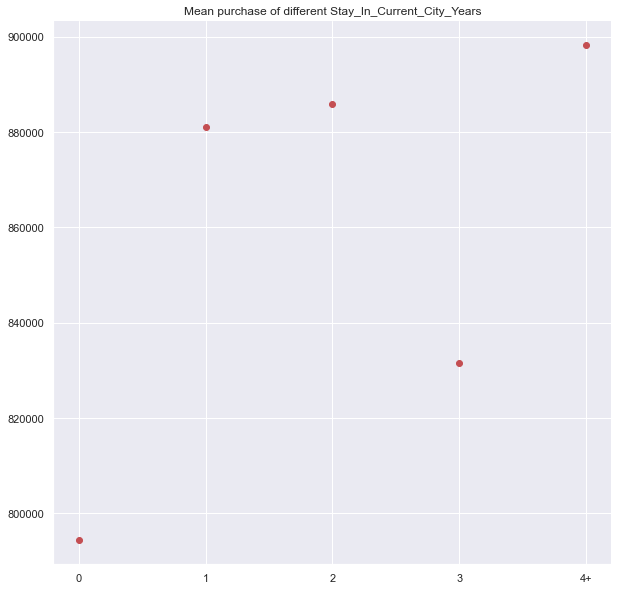

In [33]:
x = data.groupby(["Stay_In_Current_City_Years"]).mean()[["Purchase"]].index
y = data.groupby(["Stay_In_Current_City_Years"]).mean()[["Purchase"]].values
plt.plot(x, y,"ro")
plt.xticks(x, ["0","1","2","3","4+"])
plt.title("Mean purchase of different Stay_In_Current_City_Years")
sns.despine()

From this plot we can say that people who are in city since 4+ years contributed more towards the sales followed by 2 & 1 Years of stay in city

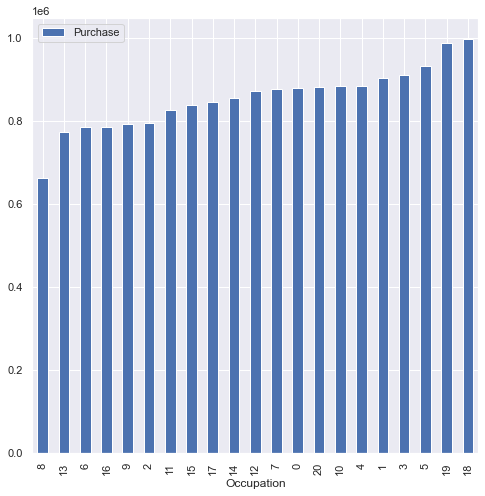

In [34]:
data.groupby(['Occupation']).mean()[['Purchase']].sort_values(by="Purchase").plot(kind='bar',figsize=(8,8))
plt.show()

From this plot we can say that people in Occupation Code 18 contributed more towards the sales.

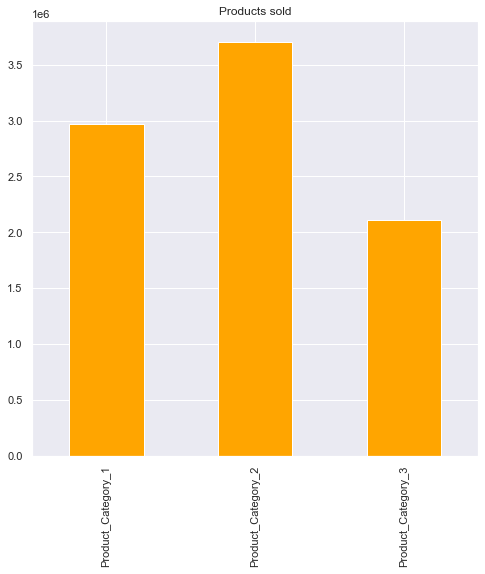

In [35]:
data.sum()[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].plot.bar(title="Products sold", color="orange",figsize=(8,8))
plt.show()

From this plot we can say that Product_Category_2 is highly sold followed by Product_Category_1

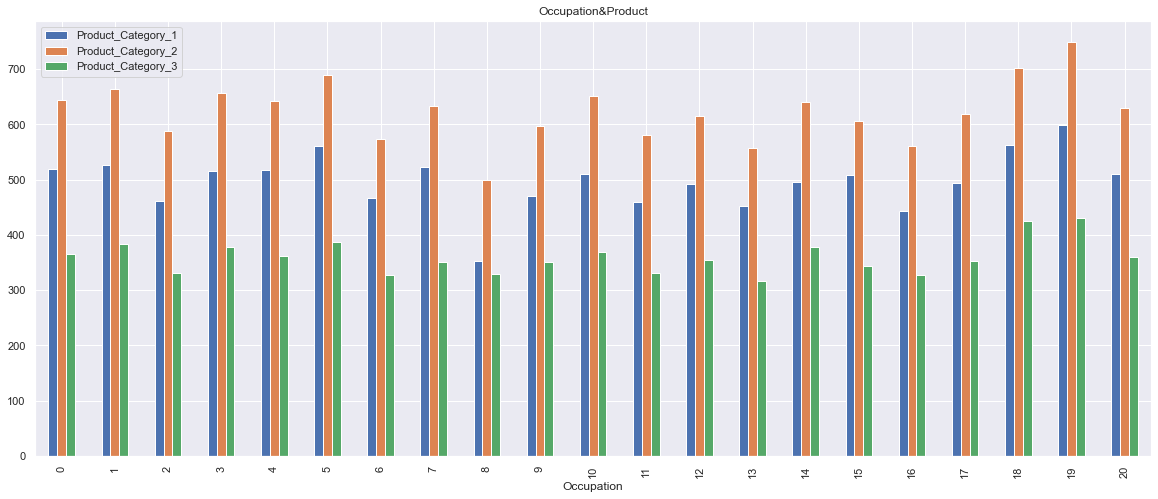

In [36]:
data.groupby(["Occupation"]).mean()[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].plot.bar(title="Occupation&Product",figsize=(20,8))
plt.show()

From this plot we can say that Product_Category_2 is more preferred and more products across categories are choosen by those with OccupationCode=19

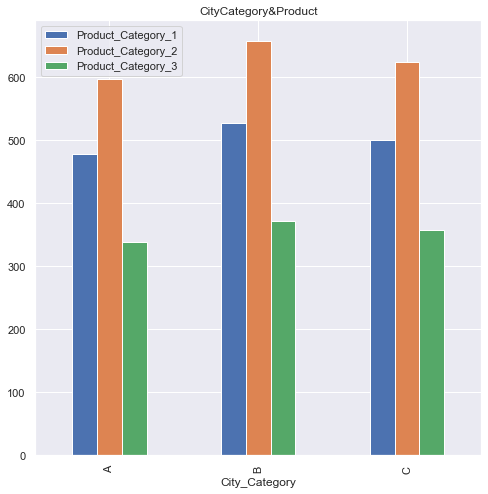

In [37]:
data.groupby(["City_Category"]).mean()[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].plot.bar(title="CityCategory&Product",figsize=(8,8))
plt.show()

From this we can say that Product_Category_2 is more preferred and people in CityCategory=B have opted for more Products.

Now, Let us see the correlation between the features i.e., find the feature of high importance

For finding the correlation between features, let us convert all features to numerical

In [38]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cat_col = data.select_dtypes(include="object").columns.tolist()
for i in cat_col:
    data.loc[:, i] = le.fit_transform(data.loc[:, i])

1. Let us try this with a HeatMap first

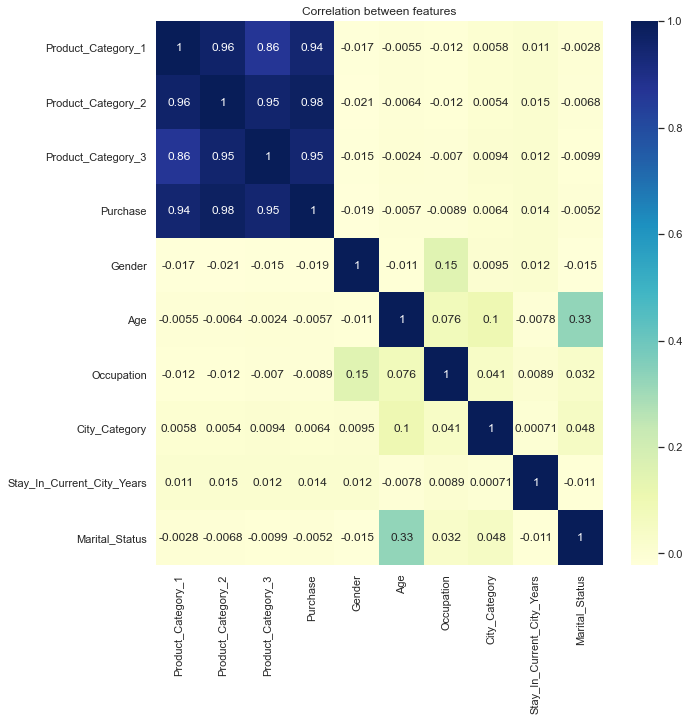

In [39]:
sns.heatmap(data.drop("User_ID", axis=1).corr(), annot=True, cmap="YlGnBu").set_title("Correlation between features")
sns.set(rc={'figure.figsize':(15,15)})

* From this Heatmap we can say that Product_Category_2 is highly correlated to Purchase followed by Product_Category_3 & Product_Category_1.
* Age is highly correlated with Marital_status.
* Occupation is correlated with Gender

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Product_Category_1          5891 non-null   int64
 1   Product_Category_2          5891 non-null   int64
 2   Product_Category_3          5891 non-null   int64
 3   Purchase                    5891 non-null   int64
 4   User_ID                     5891 non-null   int64
 5   Gender                      5891 non-null   int32
 6   Age                         5891 non-null   int32
 7   Occupation                  5891 non-null   int64
 8   City_Category               5891 non-null   int32
 9   Stay_In_Current_City_Years  5891 non-null   int32
 10  Marital_Status              5891 non-null   int64
dtypes: int32(4), int64(7)
memory usage: 414.3 KB


In [ ]:
X = data.drop("Purchase",axis=1)  #independent columns
y = data['Purchase']    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Feature: 0, Score: 546.67226
Feature: 1, Score: 354.28733
Feature: 2, Score: 951.47876
Feature: 3, Score: -0.01538
Feature: 4, Score: -3363.17092
Feature: 5, Score: -1179.06623
Feature: 6, Score: 239.22759
Feature: 7, Score: -897.74473
Feature: 8, Score: 1272.93221
Feature: 9, Score: 3919.43264


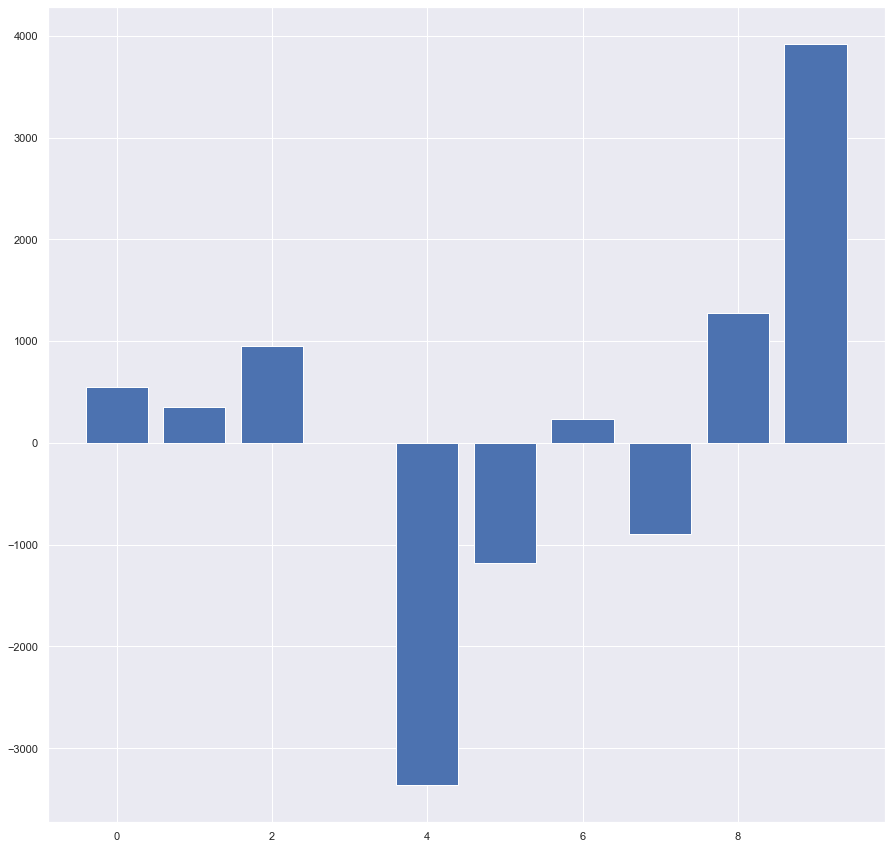

In [41]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
#X, y = make_regression(n_samples=5891, n_features=9, n_informative=5, random_state=1)
X = data.drop("Purchase",axis=1)  #independent columns
y = data['Purchase']    #target column i.e price range
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_   
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()